In [53]:
import pandas as pd
import numpy as n
#import pylab as p
import glob
from scipy.signal import butter, lfilter, freqz
%matplotlib inline

In [44]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = .5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b,a = butter_bandpass(lowcut, highcut, fs, order=order)
    y=lfilter(b, a, data)
    return y



In [45]:
fs = 500 #Hz
lowcut = 2 #Hz
highcut = 8 #Hz

In [22]:
datafiles= glob.glob('/Users/sherlock/projects/kaggle/IndominusRex/data/train/subj1_series1_*.csv')
print datafiles

['/Users/sherlock/projects/kaggle/IndominusRex/data/train/subj1_series1_data.csv', '/Users/sherlock/projects/kaggle/IndominusRex/data/train/subj1_series1_events.csv']


In [70]:
data_tbl = pd.read_csv(datafiles[0]); events_tbl = pd.read_csv(datafiles[-1])
fdata_tbl = data_tbl.copy(); fevents_tbl = events_tbl.copy()
print data_tbl.keys()
print events_tbl.keys()

Index([u'id', u'Fp1', u'Fp2', u'F7', u'F3', u'Fz', u'F4', u'F8', u'FC5', u'FC1', u'FC2', u'FC6', u'T7', u'C3', u'Cz', u'C4', u'T8', u'TP9', u'CP5', u'CP1', u'CP2', u'CP6', u'TP10', u'P7', u'P3', u'Pz', u'P4', u'P8', u'PO9', u'O1', u'Oz', u'O2', u'PO10'], dtype='object')
Index([u'id', u'HandStart', u'FirstDigitTouch', u'BothStartLoadPhase', u'LiftOff', u'Replace', u'BothReleased'], dtype='object')


HandStart
FirstDigitTouch
BothStartLoadPhase
LiftOff
Replace
BothReleased


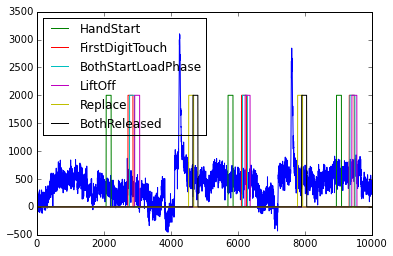

In [51]:
data_tbl.keys()
data_tbl['Fp1']
p.plot(data_tbl['Fp1'][:10000])
for e in events_tbl.keys():
    if e !='id': 
            print e
            p.plot(events_tbl[e][:10000]*2000, label=e)
p.legend(loc=2)            
        

(0, 20)

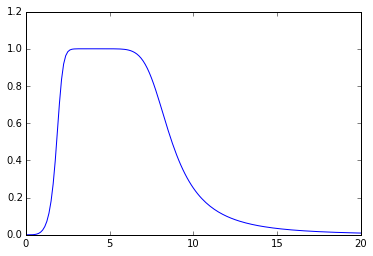

In [68]:
#Filtering data with bandpass from 2- 8Hz. order=5 filter 
#Plot frequency response
b, a = butter_bandpass(lowcut, highcut, fs, order=4)
w, h = freqz(b, a, worN=2000)
p.plot((fs * .5/n.pi) * w, abs(h))
p.xlim(0,20)

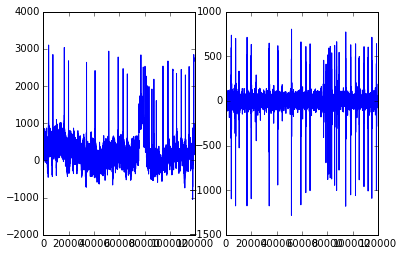

In [74]:
#actually filter all the data

y = butter_bandpass_filter(data_tbl['Fp1'], lowcut, highcut, fs, order=4)
p.subplot(121)
p.plot(data_tbl['Fp1'])
p.subplot(122)
p.plot(y)
for b in data_tbl.keys():
    if b != 'id':
        fdata_tbl[b] = butter_bandpass_filter(data_tbl[b], lowcut, highcut, fs, order=4)
        

In [79]:
def get_ensemble_avg(datas, events):
    ans = n.zeros(150)
    index = 0
    cnt = 0
    while True:
        index_arr = n.where(events[index:] == 1)[0]
        if len(index_arr) == 0: break
        index+= index_arr[0]
        ans=ans + datas.values[index:index+150]
        index+= 150 #set to next 0 in array, now can look for next 1
        cnt+=1
    return ans/cnt
    
#average all the events 
averages = {}
for b in fdata_tbl.keys():
    if b not in averages.keys() and b !='id': 
        averages[b] = {}
    for e in fevents_tbl.keys():
        if b == 'id' or e =='id': continue
        if e not in averages.keys():
            averages[b][e] = n.zeros(150)
        averages[b][e] = get_ensemble_avg(fdata_tbl[b], fevents_tbl[e])
            
# last=first+ np.where(events.HandStart[first:] == 0)[0][0]        

In [81]:
averages['P3'].keys()


['HandStart',
 'LiftOff',
 'Replace',
 'BothStartLoadPhase',
 'FirstDigitTouch',
 'BothReleased']

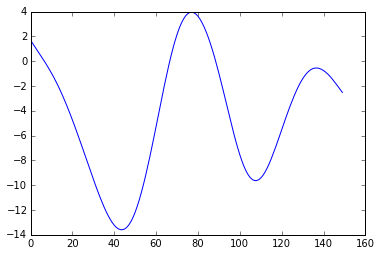

In [83]:
p.plot(averages['Fp1']['HandStart'])